# Analysis on Global Terrorism Dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
df = pd.read_csv('globTerr_dataset.csv',encoding ='ISO-8859-1')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Summarizing the Dataset

In [5]:
df.shape

(181691, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                          'region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed',
                          'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                          'weaptype1_txt':'Weapon_type','latitude':'Latitude',
                          'longitude':'Longitude','target1':'Target','city':'City'},inplace=True)

In [10]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Checking missing values

In [11]:
df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

Percentage of missing values:

In [12]:
missing_values = (((df.isnull().sum()).sum())/df.size)*100
print(missing_values)

56.481718962414206


As we can see, more than 50% of the data contains null values and hence cleaning the data is very much necessary. So a new dataset is created with the necessary columns.

The new dataset is going to contain Year , Month, Date, Country, State, Region,City, location,attack Type, No of people Killed , No of people injured and so on..

In [13]:
df1 = df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attack_Type','Killed',
              'Wounded','Group','Target','Target_Type','Weapon_type']]
df1.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


In [14]:
df1.shape

(181691, 16)

This has 16 columns in the updated dataset.

Number of Unique values for each column 

In [15]:
for i in df1.columns:
    print(i,df1[i].nunique())

Year 47
Month 13
Day 32
Country 205
State 2855
Region 12
City 36674
Latitude 48322
Longitude 48039
Attack_Type 9
Killed 205
Wounded 238
Group 3537
Target 86006
Target_Type 22
Weapon_type 12


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack_Type  181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Group        181691 non-null  object 
 13  Target       181055 non-null  object 
 14  Target_Type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


For Balancing the dataset , the null values in the column Wounded and Killed are filled with 0.

In [17]:
df1['Wounded'] = df1['Wounded'].fillna(0).astype(int)
df1['Killed'] = df1['Killed'].fillna(0).astype(int)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack_Type  181691 non-null  object 
 10  Killed       181691 non-null  int32  
 11  Wounded      181691 non-null  int32  
 12  Group        181691 non-null  object 
 13  Target       181055 non-null  object 
 14  Target_Type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(2), int32(2), int64(3), object(9)
memory usage: 20.8+ MB


In [19]:
df1.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0,0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0,0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0,0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0,0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0,0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


## Univariate Analysis

In [20]:
df1['Attack_Type'].value_counts() # the no of datapoints for each attack type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

In [21]:
(df1['Attack_Type'].value_counts()/df1.shape[0])*100 # the percentage value of each attack 

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: Attack_Type, dtype: float64

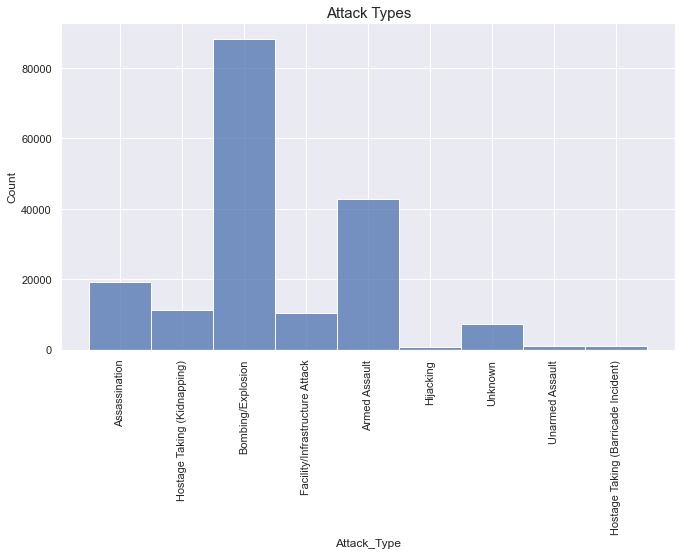

In [22]:
# 10 most attacked targets

plt.figure(figsize = (11,6))
sns.histplot(df1['Attack_Type'],palette='rocket')

plt.title('Attack Types',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Conclusion :** 

*   50% of the Attack happened with Bombing/Explosion
*   10-20% of the Attack happened with Armed Assault and Assassination 
* rest of the incidents are in between 0-6%

In [23]:
# Terrorist Targets: The  Top Ten Countries Which Suffer Most From Terrorism
df1.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

Plotting a bar:

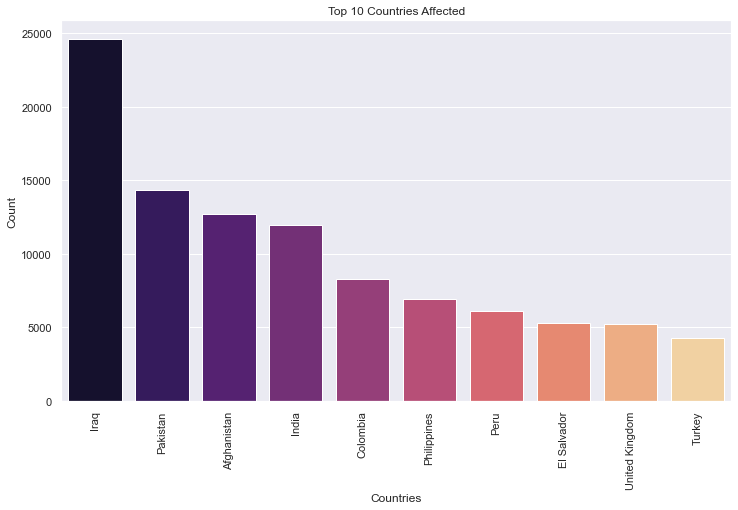

In [24]:
plt.figure(figsize=(12,7))
sns.barplot(df1['Country'].value_counts()[:10].index,df1['Country'].value_counts()[:10].values,palette='magma')
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

According to the dataset, Iraq is the most affected country by terrorism, then comes Pakistan and Afganistan

In [25]:
(df1['Target_Type'].value_counts().head(10)/df1['Target_Type'].shape[0])*100
#Percentage of data values having a particular target type 

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_Type, dtype: float64

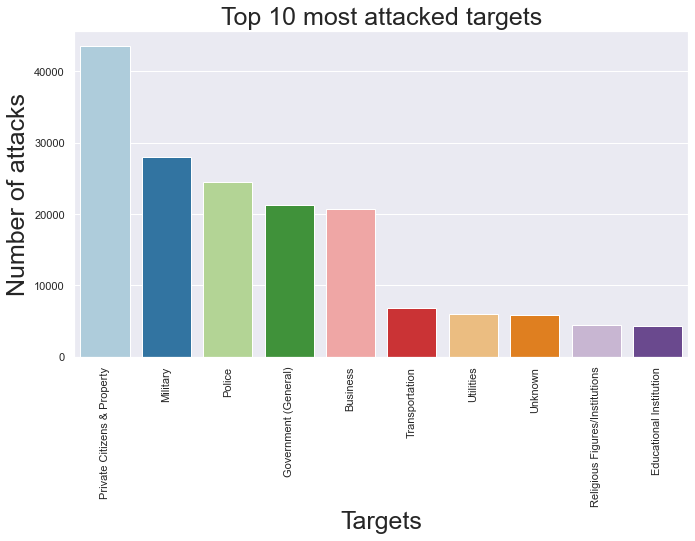

In [26]:
# the 10 most targeted areas for terrorism
plt.figure(figsize = (11,6))
sns.barplot(df1['Target_Type'].value_counts().head(10).index, df1['Target_Type'].value_counts().head(10).values, 
            palette='Paired')
plt.title('Top 10 most attacked targets',fontsize=25)
plt.xlabel('Targets',fontsize=25)
plt.ylabel('Number of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

This Graph demonstrates:

* The most Attacked Target is 'Private Citizens & Property' which is approximately 25%
* 10-20% is the Target which is 'Military','Police', 'Government', 'Business'

Plotting graphs between the regions, States and number of attacks respectively  to find the most attacked regions and states

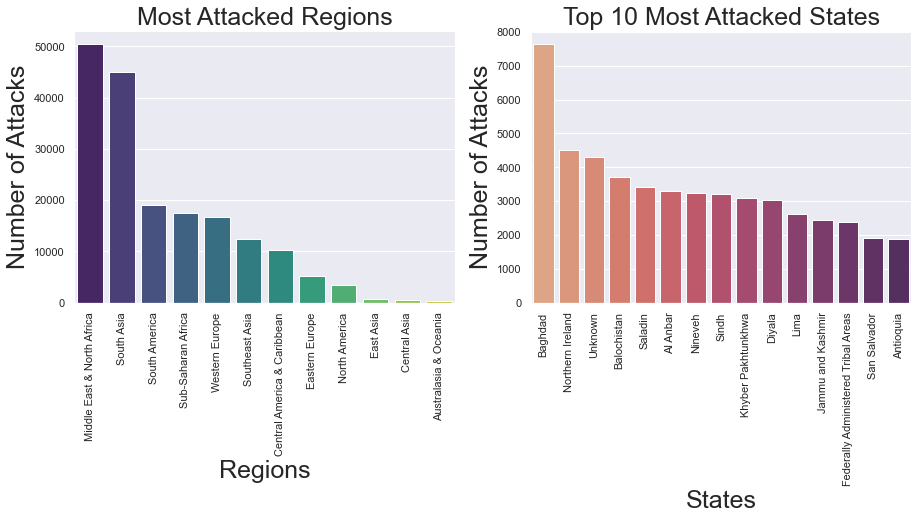

In [27]:
plt.subplot(1,2,1)
# regions with most attacks 
sns.barplot(df1['Region'].value_counts().index, df1['Region'].value_counts().values,palette='viridis')
plt.title('Most Attacked Regions',fontsize=25)
plt.xlabel('Regions',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(df1['State'].value_counts().head(15).index, df1['State'].value_counts().head(15).values,palette='flare')
plt.title('Top 10 Most Attacked States',fontsize=25)
plt.xlabel('States',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

With these Graphs, we can conclude that :

* Most Attacked Region is 'Middle East and North Africa' then comes South Asia
* Most Attacked States is 'Baghdad'

In [28]:
(df1['Weapon_type'].value_counts().head()/df1['Weapon_type'].shape[0])*100

Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: Weapon_type, dtype: float64

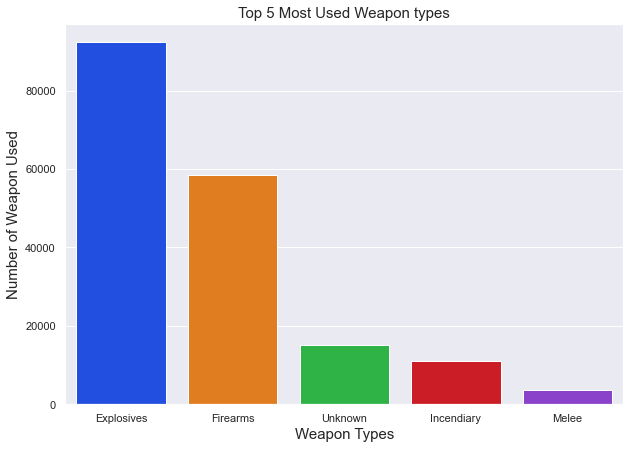

In [29]:
# Top 5 most used weapons types in terror attacks
plt.figure(figsize=(10,7))
sns.barplot(df1['Weapon_type'].value_counts().head().index, df1['Weapon_type'].value_counts().head().values,palette='bright')
plt.title('Top 5 Most Used Weapon types',fontsize=15)
plt.xlabel('Weapon Types',fontsize=15)
plt.ylabel('Number of Weapon Used',fontsize=15)
plt.show()

As we can see that Almost 50% of Weapon used are 'Explosives' whereas 32% of them are 'Firearms' used in the terrorism.

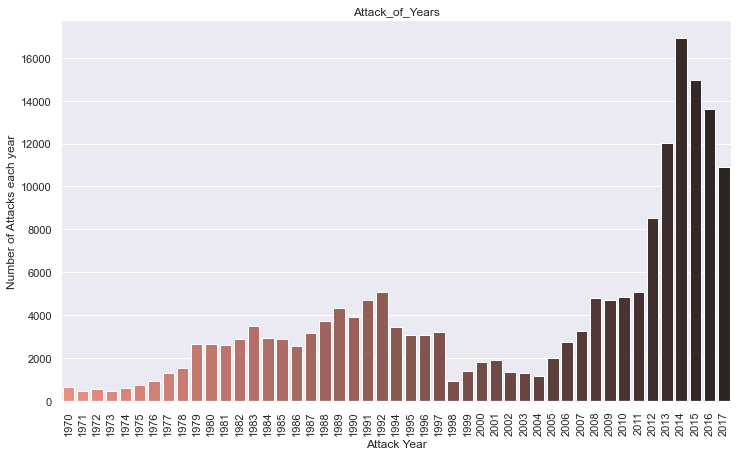

In [30]:
x_year = df1['Year'].unique() 
y_count_years = df1['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,7))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark:salmon_r')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

This graphs shows that 

* 2014 appears to be witness of a huge terrorist attacks
* 2014 onwards recorded a large increase in attacks of terrorism.

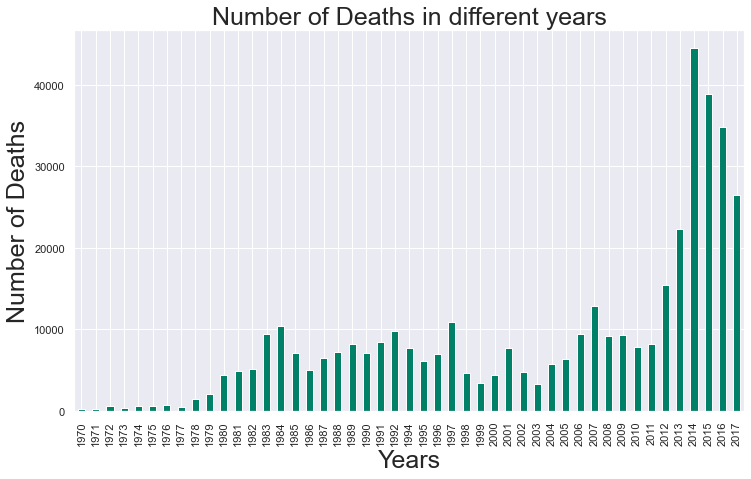

In [31]:
plt.figure(figsize = (12,7))
df1.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()

Number of deaths caused by terrorism is more between 2014 and 2018, with on an average >50K people being killed. High peak went to 2014 with 45K+ deaths. 

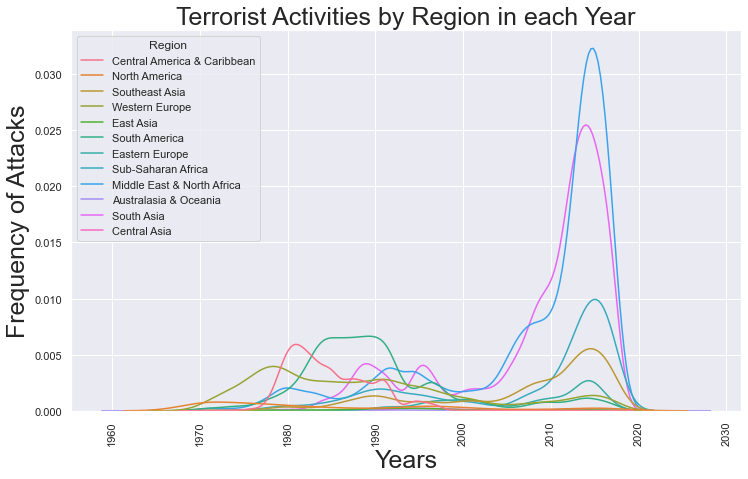

In [32]:
plt.figure(figsize = (12,7))
sns.kdeplot(df1['Year'], hue = df1['Region'])
plt.title('Terrorist Activities by Region in each Year',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Frequency of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

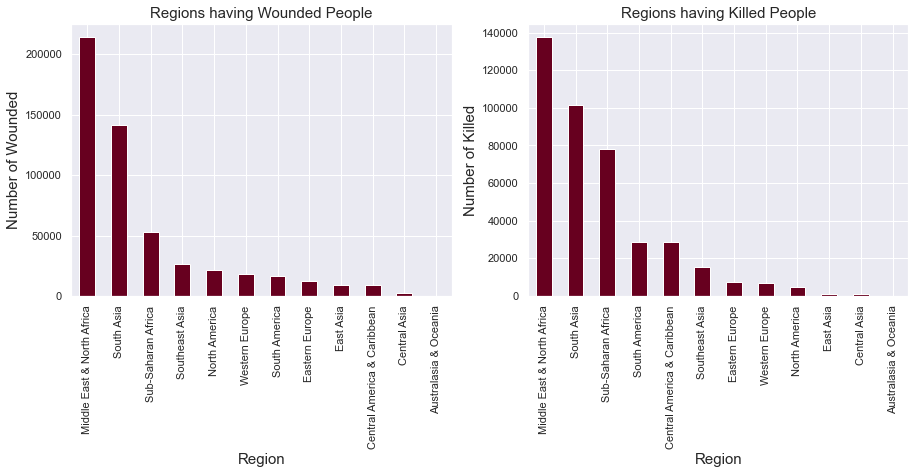

In [33]:
plt.subplot(1,2,1)

df1.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='PuRd_r')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
df1.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='PuRd_r')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

As we can see that 'Middle East & North Africa' has the most Killed people (>1.4 Lacs) and wounded people (>2 lacs)

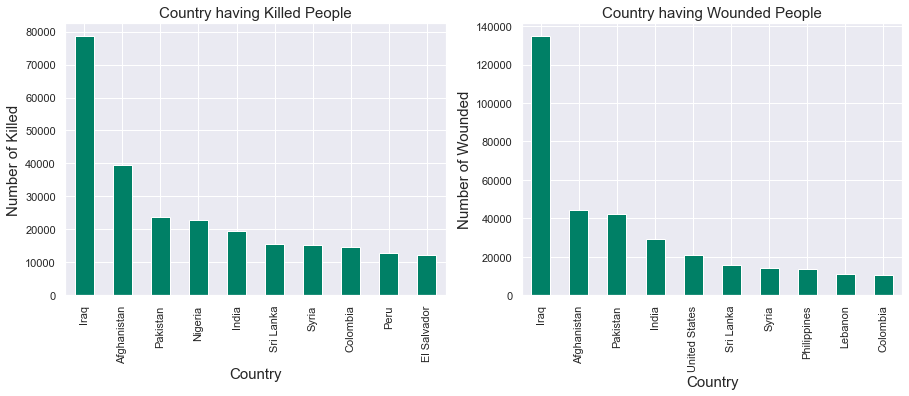

In [34]:
plt.subplot(1,2,2)

df2=df1.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='summer')
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,1)
df1.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='summer')
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Iraq' has the most Killed people (>70K) and wounded people (>1.2 lacs) Afganistan, pakistan and India all saw peak deaths while Iraq, which has overtaken all of these at the top of the table, suffered 37,700 more fatalities.

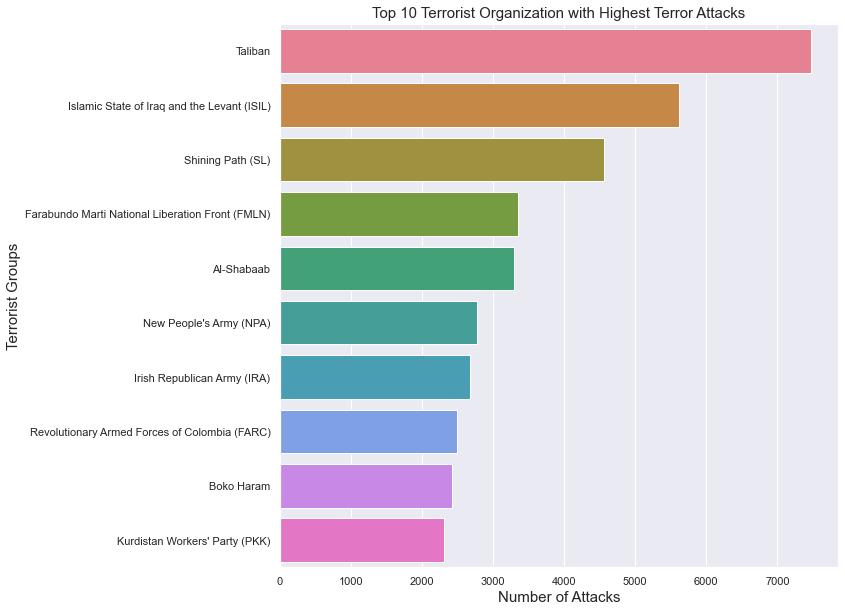

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(df1['Group'].value_counts()[1:11].values, df1['Group'].value_counts()[1:11].index,palette='husl')
plt.title('Top 10 Terrorist Organization with Highest Terror Attacks',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()

In [36]:
df_tal = df1[df1.Group == 'Taliban']

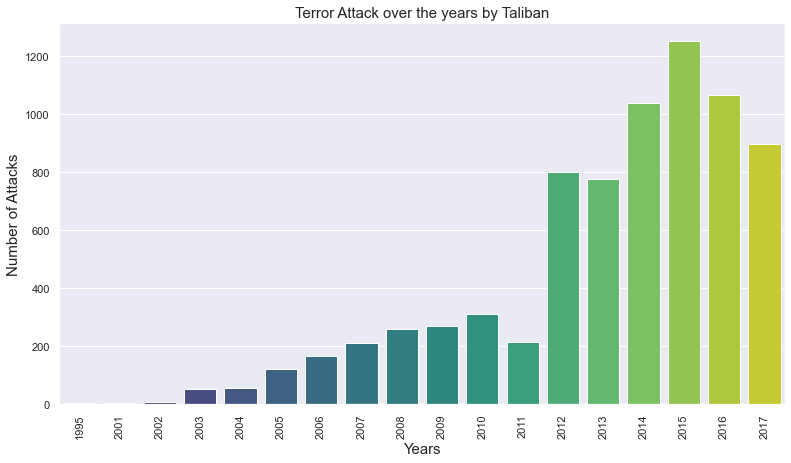

In [37]:
# Terror attacks by taliban over the years
plt.figure(figsize = (13,7))
sns.barplot(df_tal['Year'].value_counts().index,df_tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

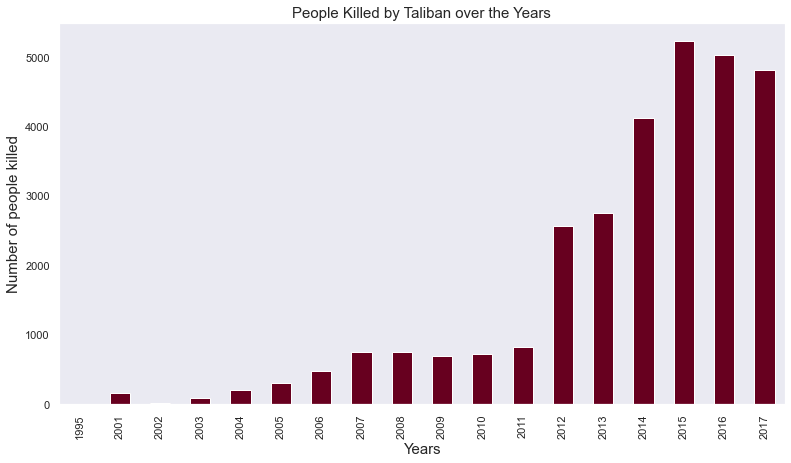

In [38]:
plt.figure(figsize=(13,7))
df_tal.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='RdBu')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Taliban killed more than 5000 people during 2015 after that a decreasing trend could be seen but still the numbers are very high.

## Conclusions:


**After performing the Analysis we get the following insights from the data:**
* Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.
* Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
* Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.
* Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
* The State and City that was most affected was Baghdad
* In the last decade 2014 had most number of terror attacks. 
* The most common attack type was Bombing/Explosion.
* Explosives have been consistently the most popular weapon of choice for terrorists.
* Taliban became more active since 2012 and they are responsible for the most of the terror attacks